In [1]:
import pandas as pd 
df = pd.read_csv(r'C:\Users\Administrateur\Downloads\HousingPrices.csv') 
df.head()

,TransactionDate,HouseAge,DistanceToMRT,NumStores,Latitude,Longitude,UnitPrice
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
df.select_dtypes('int64').head()

,TransactionDate,NumStores
0,2012,10
1,2012,9
2,2013,5
3,2013,5
4,2012,5


The memory_usage function does just what the name suggests – reports back the memory usage. By default, the reporting is done per column and in bytes, but we’ll see how to change it in a bit.

In [3]:
df.memory_usage()

Index                64
TransactionDate    3312
HouseAge           3312
DistanceToMRT      3312
NumStores          3312
Latitude           3312
Longitude          3312
UnitPrice          3312
dtype: int64

In [4]:
df.memory_usage().sum()

23248

In [5]:
df.memory_usage().sum() / 1e+6  # in megabytes

0.023248

The query function is used to filter the dataset and to grab records of interest. The filtering format is what makes it special. There’s no need to manage tens of brackets if you are filtering by multiple conditions, as this function enables you to pass filter condition as a string.
Let’s take a look at a simpler example first — we are interested in houses that are between 20 and 30 years old:

In [6]:
df.query('20 < HouseAge <= 30').head()

,TransactionDate,HouseAge,DistanceToMRT,NumStores,Latitude,Longitude,UnitPrice
7,2013,20.3,287.6025,6,24.98042,121.54228,46.7
13,2012,20.4,2469.6450,4,24.96108,121.51046,23.8
25,2013,29.3,1487.8680,2,24.97542,121.51726,27.0
30,2013,25.9,4519.6900,0,24.94826,121.49587,22.1
31,2012,29.6,769.4034,7,24.98281,121.53408,25.0


In [7]:
# But what if we want to test for multiple conditions? Just put the and or or keywords in between:

df.query('20 < HouseAge <= 30 and NumStores == 6').head()

,TransactionDate,HouseAge,DistanceToMRT,NumStores,Latitude,Longitude,UnitPrice
7,2013,20.3,287.6025,6,24.98042,121.54228,46.7
217,2012,28.0,372.6242,6,24.97838,121.54119,40.8
294,2013,26.4,335.5273,6,24.97960,121.54140,38.1
323,2013,28.6,197.1338,6,24.97631,121.54436,42.5
335,2013,27.3,337.6016,6,24.96431,121.54063,36.5


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionDate  414 non-null    int64  
 1   HouseAge         414 non-null    float64
 2   DistanceToMRT    414 non-null    float64
 3   NumStores        414 non-null    int64  
 4   Latitude         414 non-null    float64
 5   Longitude        414 non-null    float64
 6   UnitPrice        414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.7 KB


<AxesSubplot:ylabel='UnitPrice'>

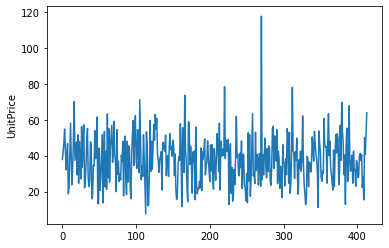

In [10]:
# simple time series plot
sns.lineplot(data = df["UnitPrice"])

In [11]:
# zooming in on specific date range
#drange = df.loc["2013": "2015"]
#sns.lineplot(data = drange["UnitPrice"])

In [12]:
df

,TransactionDate,HouseAge,DistanceToMRT,NumStores,Latitude,Longitude,UnitPrice
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013,8.1,104.81010,5,24.96674,121.54067,52.5


In [13]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.1.2'

In [14]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


array([[<AxesSubplot:title={'center':'housing_median_age'}>]],
      dtype=object)

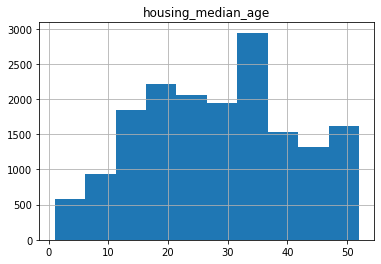

In [16]:
california_housing_dataframe.hist('housing_median_age')

In [17]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [18]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [19]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [20]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


In [21]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

In [22]:
# The example below creates a new Series that indicates whether population is over one million:

population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

In [23]:
# adds two Series to an existing DataFrame:

cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


Modify the cities table by adding a new boolean column that is True if and only if both of the following are True:

The city is named after a saint.
The city has an area greater than 50 square miles.
Note: Boolean Series are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing logical and, use & instead of and.

Hint: "San" in Spanish means "saint."

In [24]:
cities.columns

Index(['City name', 'Population', 'Area square miles', 'Population density'], dtype='object')

In [25]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


In [26]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [27]:
cities.index

RangeIndex(start=0, stop=3, step=1)

In [28]:
# Call DataFrame.reindex to manually reorder the rows

cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


Reindexing is a great way to shuffle (randomize) a DataFrame. In the example below, we take the index, which is array-like, and pass it to NumPy's random.permutation function, which shuffles its values in place. Calling reindex with this shuffled array causes the DataFrame rows to be shuffled in the same way.

In [29]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


In [30]:
cities.reindex([0, 4, 5, 2])

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469.0,46.87,18187.945381,False
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False
